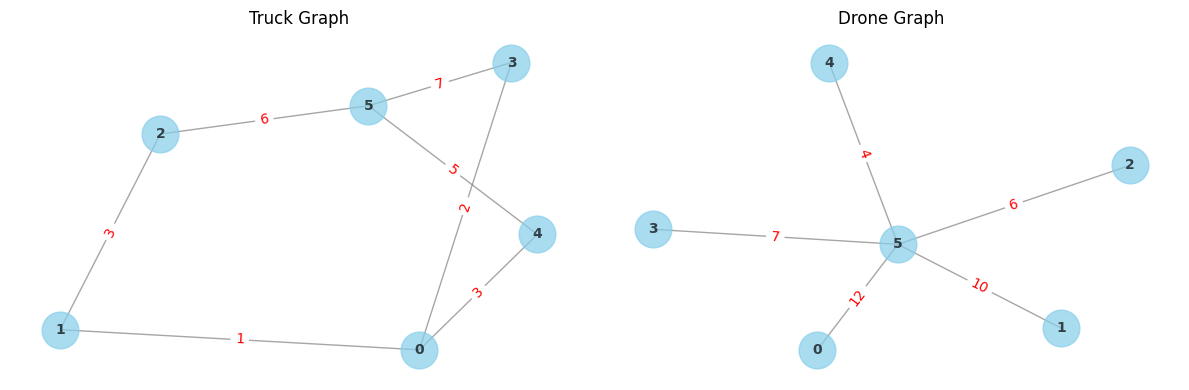

Total cost (Combined): 7
Minimum cost path (Combined): [0, 4, 5]
Path covered by truck in combined graph:
Edge: (0, 4), Weight (Truck): 3
Path covered by drone in combined graph:
Edge: (4, 5), Weight (Drone): 4


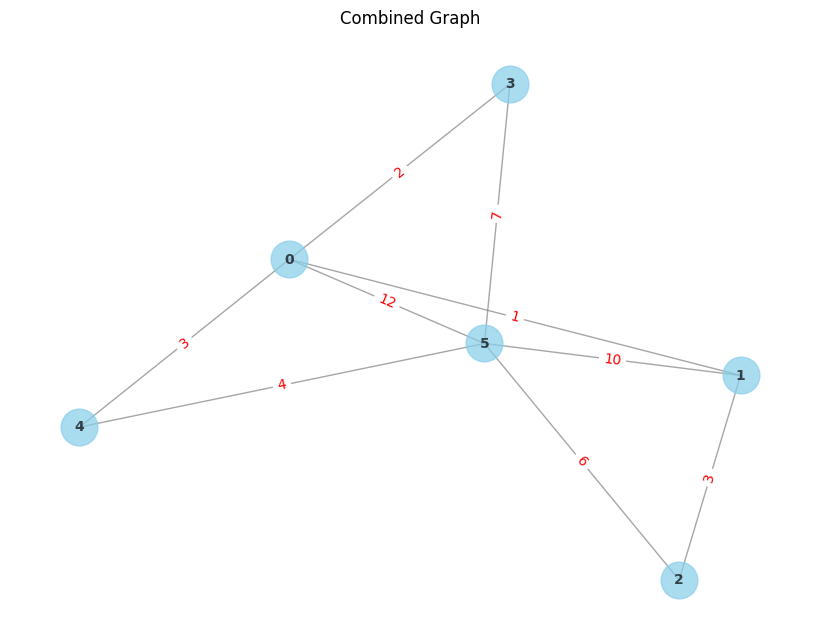

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
drone_path_edges = [(0, 5, 12), (4, 5, 4), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# Create truck graph
truck_G = nx.Graph()
truck_G.add_weighted_edges_from(truck_path_edges)

# Create drone graph
drone_G = nx.Graph()
drone_G.add_weighted_edges_from(drone_path_edges)

# Combine the graphs, resolving common edges with minimum weight
combined_G = nx.Graph()
for edge in set(truck_G.edges).union(drone_G.edges):
    if edge in truck_G.edges and edge in drone_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        min_weight = min(weight_truck, weight_drone)
        combined_G.add_edge(edge[0], edge[1], weight=min_weight)
    elif edge in truck_G.edges:
        combined_G.add_edge(edge[0], edge[1], weight=truck_G[edge[0]][edge[1]]['weight'])
    elif edge in drone_G.edges:
        combined_G.add_edge(edge[0], edge[1], weight=drone_G[edge[0]][edge[1]]['weight'])

# Plot individual truck graph
plt.figure(figsize=(12, 4))
plt.subplot(121)
pos_truck = nx.spring_layout(truck_G)
nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
plt.title("Truck Graph")

# Plot individual drone graph
plt.subplot(122)
pos_drone = nx.spring_layout(drone_G)
nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
plt.title("Drone Graph")

plt.tight_layout()
plt.show()

# Plot the combined graph
plt.figure(figsize=(8, 6))
pos_combined = nx.spring_layout(combined_G)
nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
plt.title("Combined Graph")

# Calculate the total cost of the combined graph
total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=5, weight='weight')
print("Total cost (Combined):", total_cost_combined)

# Find and print the minimum cost path in the combined graph
min_cost_path_combined = nx.shortest_path(combined_G, source=0, target=5, weight='weight')
print("Minimum cost path (Combined):", min_cost_path_combined)

truck_path_combined = []
for i in range(len(min_cost_path_combined) - 1):
    edge = (min_cost_path_combined[i], min_cost_path_combined[i + 1])
    if edge in truck_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_truck == weight_combined:
            truck_path_combined.append((edge, weight_truck))

print("Path covered by truck in combined graph:")
for (edge, weight) in truck_path_combined:
    print(f"Edge: {edge}, Weight (Truck): {weight}")

drone_path_combined = []
for i in range(len(min_cost_path_combined) - 1):
    edge = (min_cost_path_combined[i], min_cost_path_combined[i + 1])
    if edge in drone_G.edges:
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_drone == weight_combined:
            drone_path_combined.append((edge, weight_drone))

print("Path covered by drone in combined graph:")
for (edge, weight) in drone_path_combined:
    print(f"Edge: {edge}, Weight (Drone): {weight}")

plt.show()

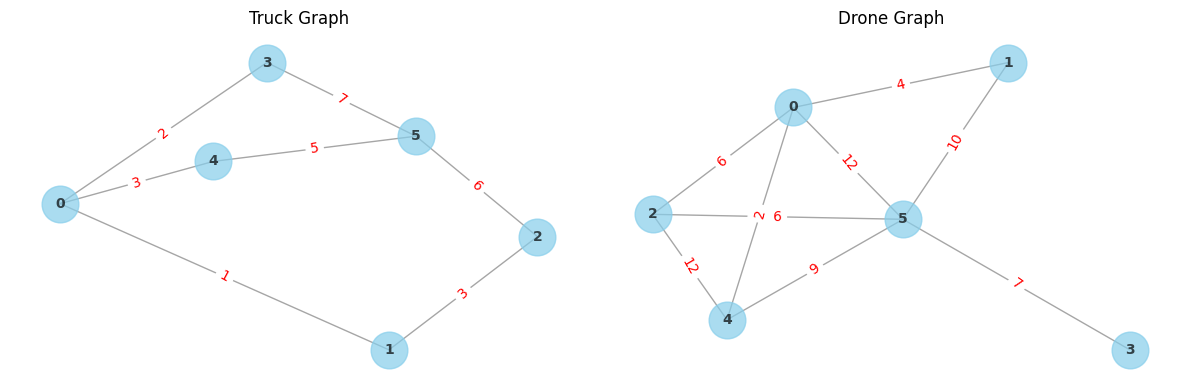

Total cost (Combined): 10
Minimum cost path (Combined 0->2): [0, 1, 2]
Minimum cost path (Combined 2->4): [2, 1, 0, 4]
Path covered by truck in combined graph:
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 1), Weight (Truck): 3
Edge: (1, 0), Weight (Truck): 1
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2


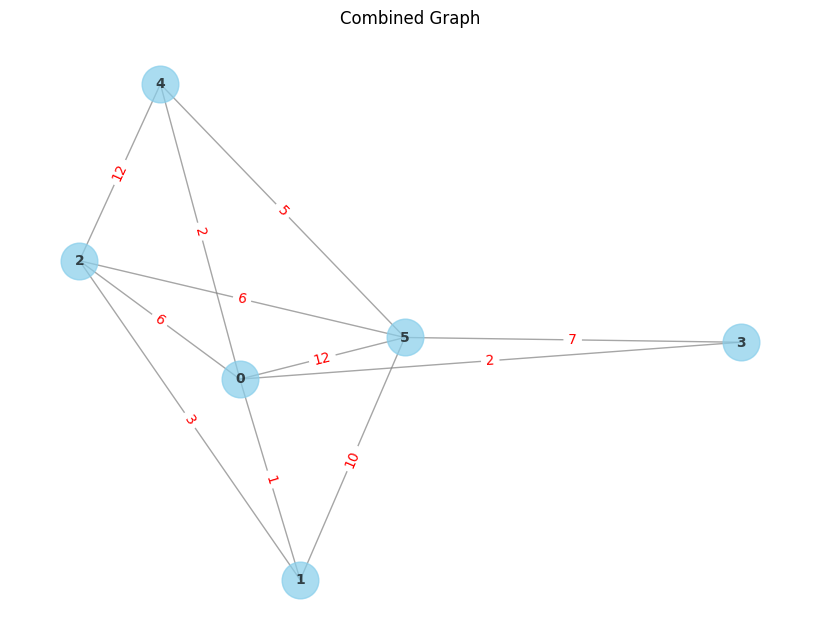

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges for each path considering multiple final destinations
truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
drone_path_edges = [(0, 5, 12), (4, 5, 9), (3, 5, 7), (1, 5, 10), (2, 5, 6),(0,4,2),(0,1,4),(2,4,12),(0,2,6)]

# Create truck graph
truck_G = nx.Graph()
truck_G.add_weighted_edges_from(truck_path_edges)

# Create drone graph
drone_G = nx.Graph()
drone_G.add_weighted_edges_from(drone_path_edges)

# Combine the graphs, resolving common edges with minimum weight
combined_G = nx.Graph()
for edge in set(truck_G.edges).union(drone_G.edges):
    if edge in truck_G.edges and edge in drone_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        min_weight = min(weight_truck, weight_drone)
        combined_G.add_edge(edge[0], edge[1], weight=min_weight)
    elif edge in truck_G.edges:
        combined_G.add_edge(edge[0], edge[1], weight=truck_G[edge[0]][edge[1]]['weight'])
    elif edge in drone_G.edges:
        combined_G.add_edge(edge[0], edge[1], weight=drone_G[edge[0]][edge[1]]['weight'])

# Plot individual truck graph
plt.figure(figsize=(12, 4))
plt.subplot(121)
pos_truck = nx.spring_layout(truck_G)
nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
plt.title("Truck Graph")

# Plot individual drone graph
plt.subplot(122)
pos_drone = nx.spring_layout(drone_G)
nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
plt.title("Drone Graph")

plt.tight_layout()
plt.show()

# Plot the combined graph
plt.figure(figsize=(8, 6))
pos_combined = nx.spring_layout(combined_G)
nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
plt.title("Combined Graph")

# Calculate the total cost of the combined graph
total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=2, weight='weight') + nx.shortest_path_length(combined_G, source=2, target=4, weight='weight')
print("Total cost (Combined):", total_cost_combined)

# Find and print the minimum cost path in the combined graph
min_cost_path_combined_02 = nx.shortest_path(combined_G, source=0, target=2, weight='weight')
min_cost_path_combined_24 = nx.shortest_path(combined_G, source=2, target=4, weight='weight')
print("Minimum cost path (Combined 0->2):", min_cost_path_combined_02)
print("Minimum cost path (Combined 2->4):", min_cost_path_combined_24)

# Determine which path the truck will cover
truck_path_combined = []
for i in range(len(min_cost_path_combined_02) - 1):
    edge = (min_cost_path_combined_02[i], min_cost_path_combined_02[i + 1])
    if edge in truck_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_truck == weight_combined:
            truck_path_combined.append((edge, weight_truck))

for i in range(len(min_cost_path_combined_24) - 1):
    edge = (min_cost_path_combined_24[i], min_cost_path_combined_24[i + 1])
    if edge in truck_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_truck == weight_combined:
            truck_path_combined.append((edge, weight_truck))

print("Path covered by truck in combined graph:")
for (edge, weight) in truck_path_combined:
    print(f"Edge: {edge}, Weight (Truck): {weight}")

# Determine which path the drone will cover
drone_path_combined = []
# if min_cost_path_combined_02[-1] == min_cost_path_combined_24[0]:
    # Truck and drone meet at the common node, drone takes over from there
for i in range(len(min_cost_path_combined_02) - 1):
    edge = (min_cost_path_combined_02[i], min_cost_path_combined_02[i + 1])
    if edge in drone_G.edges:
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_drone == weight_combined:
            drone_path_combined.append((edge, weight_drone))

for i in range(len(min_cost_path_combined_24) - 1):
    edge = (min_cost_path_combined_24[i], min_cost_path_combined_24[i + 1])
    if edge in drone_G.edges:
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_drone == weight_combined:
            drone_path_combined.append((edge, weight_drone))
# else:
    # Truck and drone meet at different nodes, drone starts from the last node of truck's path


print("Path covered by drone in combined graph:")
for (edge, weight) in drone_path_combined:
    print(f"Edge: {edge}, Weight (Drone): {weight}")

plt.show()


Multiple Warehouses

Minimum Total Distance Traveled by Drone from each warehouse:
Warehouse 3 : 24
Warehouse 4 : 14
Warehouse 5 : 13

Optimal Warehouse Node for Parcel Delivery: 5
Minimum Total Distance Traveled by Drone: 9
Optimal Path Taken by Drone from Optimal Warehouse: [5, 11, 10, 9]
Path taken by Drone: 5->11->10->9
Shortest Path for Truck from Node 0 to Optimal Warehouse: [0, 2, 5]
Minimum Cost for Truck from Node 0 to Optimal Warehouse: 7


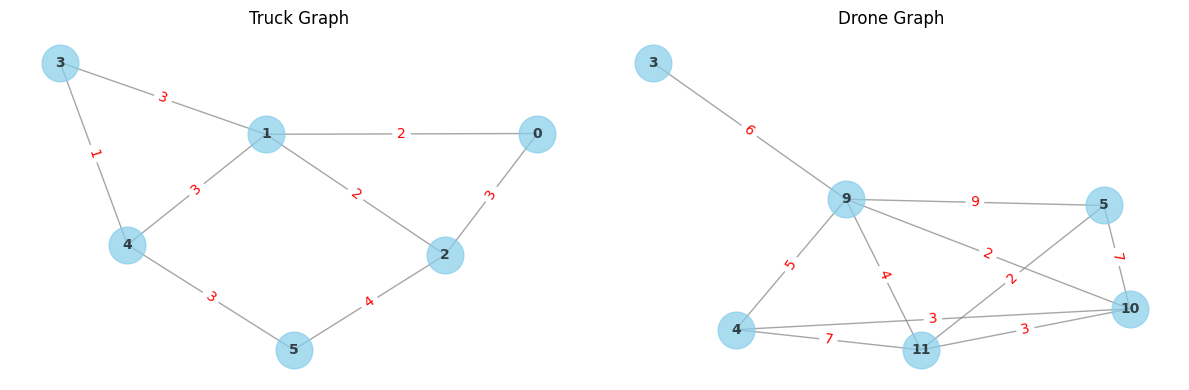

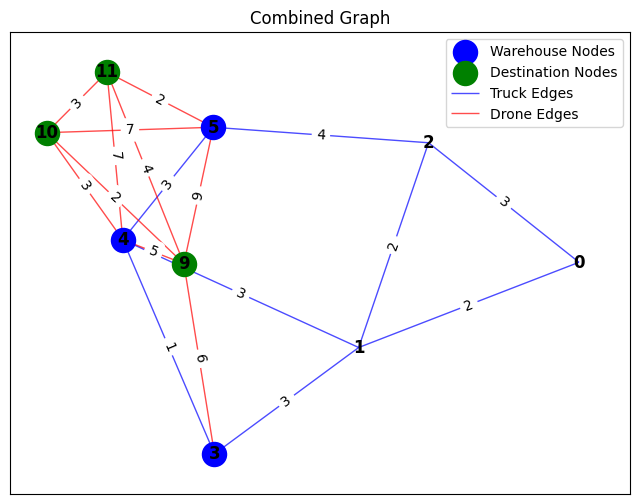

In [ ]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges for each path considering multiple final destinations
truck_path_edges = [(0, 1, 2), (0, 2, 3), (1, 2, 2), (2, 5, 4), (5, 4, 3), (1, 4, 3), (1, 3, 3), (3, 4, 1)]
drone_path_edges = [(3, 9, 3), (3, 9, 4), (3, 9, 6), (4, 9, 5), (4, 10, 3), (4, 11, 7), (5, 9, 9), (5, 10, 7), (5, 11, 2),
                    (9, 10, 2), (9, 11, 4), (10, 11, 3)]

# Create truck and drone graphs
truck_graph = nx.Graph()
drone_graph = nx.Graph()

# Add edges to truck graph
truck_graph.add_weighted_edges_from(truck_path_edges)

# Add edges to drone graph
drone_graph.add_weighted_edges_from(drone_path_edges)

# Define warehouse nodes and destination nodes
warehouse_nodes = [3, 4, 5]
destination_nodes = [9, 10, 11]

# Initialize variables to store optimal warehouse, minimum total distance, and optimal path
optimal_warehouse = None
min_total_distance = float('inf')
optimal_path = None

# Iterate over each warehouse node to find the shortest path to all destination nodes
for warehouse_node in warehouse_nodes:
    # Generate all permutations of destination nodes
    permuted_destinations = itertools.permutations(destination_nodes)

    # Iterate over each permutation
    for permuted_destination in permuted_destinations:
        total_distance = 0
        current_node = warehouse_node

        # Calculate shortest path from warehouse to the first destination node
        shortest_path_length_to_initial_dest = nx.shortest_path_length(drone_graph, current_node, permuted_destination[0], weight='weight')
        total_distance += shortest_path_length_to_initial_dest

        # Calculate total distance for current permutation
        for dest_node in permuted_destination:
            shortest_path_length = nx.shortest_path_length(drone_graph, current_node, dest_node, weight='weight')
            total_distance += shortest_path_length
            current_node = dest_node

        # Check if total distance is minimum
        if total_distance < min_total_distance:
            min_total_distance = total_distance
            optimal_warehouse = warehouse_node
            optimal_path = [warehouse_node] + list(permuted_destination)

print("Minimum Total Distance Traveled by Drone from each warehouse:")
for warehouse_node in warehouse_nodes:
    total_distance = 0
    # Calculate shortest path from warehouse to each destination using Dijkstra's algorithm
    for destination_node in destination_nodes:
        shortest_path_length = nx.shortest_path_length(drone_graph, warehouse_node, destination_node, weight='weight')
        total_distance += shortest_path_length
    print("Warehouse", warehouse_node, ":", total_distance)

print("\nOptimal Warehouse Node for Parcel Delivery:", optimal_warehouse)
print("Minimum Total Distance Traveled by Drone:", min_total_distance)
print("Optimal Path Taken by Drone from Optimal Warehouse:", optimal_path)

# Print path taken by drone
print("Path taken by Drone:", "->".join(map(str, optimal_path)))

# Calculate shortest path for truck from node 0 (source) to optimal warehouse
shortest_path_truck = nx.shortest_path(truck_graph, source=0, target=optimal_warehouse, weight='weight')
min_cost_truck = nx.shortest_path_length(truck_graph, source=0, target=optimal_warehouse, weight='weight')

# Print the path taken by truck and minimum cost
print("Shortest Path for Truck from Node 0 to Optimal Warehouse:", shortest_path_truck)
print("Minimum Cost for Truck from Node 0 to Optimal Warehouse:", min_cost_truck)


# Plot individual truck graph
plt.figure(figsize=(12, 4))
plt.subplot(121)
pos_truck = nx.spring_layout(truck_graph)
nx.draw(truck_graph, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_truck = nx.get_edge_attributes(truck_graph, 'weight')
nx.draw_networkx_edge_labels(truck_graph, pos_truck, edge_labels=edge_labels_truck, font_color='red')
plt.title("Truck Graph")

# Plot individual drone graph
plt.subplot(122)
pos_drone = nx.spring_layout(drone_graph)
nx.draw(drone_graph, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_drone = nx.get_edge_attributes(drone_graph, 'weight')
nx.draw_networkx_edge_labels(drone_graph, pos_drone, edge_labels=edge_labels_drone, font_color='red')
plt.title("Drone Graph")

plt.tight_layout()
plt.show()

# Combine truck and drone graphs
combined_G = nx.compose(truck_graph, drone_graph)

# Plot the combined graph with different colors for truck and drone
plt.figure(figsize=(8, 6))
pos_combined = nx.spring_layout(combined_G)
nx.draw_networkx_nodes(combined_G, pos_combined, nodelist=warehouse_nodes, node_color='blue', label='Warehouse Nodes')
nx.draw_networkx_nodes(combined_G, pos_combined, nodelist=destination_nodes, node_color='green', label='Destination Nodes')
nx.draw_networkx_edges(truck_graph, pos_combined, edge_color='blue', width=1, alpha=0.7, label='Truck Edges')
nx.draw_networkx_edges(drone_graph, pos_combined, edge_color='red', width=1, alpha=0.7, label='Drone Edges')
nx.draw_networkx_labels(combined_G, pos_combined, font_color='black', font_weight='bold')

# Draw edge labels
edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='black')

plt.title("Combined Graph")
plt.legend()
plt.show()

In [ ]:
pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 32.2 MB/s eta 0:00:00


In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Constants for number of warehouses, nodes, and customers
num_warehouses = 3
num_nodes = 6
num_customers = 4

# Define cost matrices for truck and drone using dummy data
# You'll need to replace these with actual data
CTruckik = {
    (0, 0): 0, (0, 1): 10, (0, 2): 15, (0, 3): 20, (0, 4): 25, (0, 5): 30,
    (1, 0): 10, (1, 1): 0, (1, 2): 12, (1, 3): 18, (1, 4): 22, (1, 5): 27,
    (2, 0): 20, (2, 1): 12, (2, 2): 0, (2, 3): 15, (2, 4): 18, (2, 5): 20
}
CDronekj = {
    (0, 0): 35, (0, 1): 40, (0, 2): 45, (0, 3): 50,
    (1, 0): 30, (1, 1): 32, (1, 2): 34, (1, 3): 36,
    (2, 0): 25, (2, 1): 27, (2, 2): 29, (2, 3): 31,
    (3, 0): 20, (3, 1): 21, (3, 2): 23, (3, 3): 25,
    (4, 0): 15, (4, 1): 17, (4, 2): 19, (4, 3): 21,
    (5, 0): 10, (5, 1): 12, (5, 2): 14, (5, 3): 16
}

# Model setup
m = gp.Model("Delivery Optimization")

# Decision variables
x = m.addVars(num_warehouses, num_nodes, vtype=GRB.BINARY, name="x")
d = m.addVars(num_nodes, num_customers, vtype=GRB.BINARY, name="d")
# Added utilization variables for truck and drone to limit each to be used once
use_truck = m.addVar(vtype=GRB.BINARY, name="use_truck")
use_drone = m.addVar(vtype=GRB.BINARY, name="use_drone")

# Objective function
m.setObjective(
    gp.quicksum(x[i, k] * CTruckik[i, k] for i in range(num_warehouses) for k in range(num_nodes)) +
    gp.quicksum(d[k, j] * CDronekj[k, j] for k in range(num_nodes) for j in range(num_customers)),
    sense=GRB.MINIMIZE)

# Constraints
# Ensure that each customer is served exactly once by truck or drone
for j in range(num_customers):
    m.addConstr((gp.quicksum(x[i, k] for i in range(num_warehouses) for k in range(num_nodes)) +
                gp.quicksum(d[k, j] for k in range(num_nodes))) == 1, f"ServeCustomer{j}")

# Limit the truck and drone to a single use
m.addConstr(gp.quicksum(x[i, k] for i in range(num_warehouses) for k in range(num_nodes)) <= use_truck, "LimitTruckUse")
m.addConstr(gp.quicksum(d[k, j] for k in range(num_nodes) for j in range(num_customers)) <= use_drone, "LimitDroneUse")

# Optimize model
m.optimize()

# Display results
if m.status == GRB.OPTIMAL:
    print('Optimal solution found:')
    for v in m.getVars():
        if v.x > 0:
            print(f'{v.varName}: {v.x}')
else:
    print('No optimal solution found.')


Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 6 rows, 44 columns and 140 nonzeros
Model fingerprint: 0xa090c26a
Variable types: 0 continuous, 44 integer (44 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 25.0000000
Presolve removed 6 rows and 44 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 0 25 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.00000000

In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Constants for number of warehouses, nodes, and customers
num_warehouses = 3
num_nodes = 6
num_customers = 4

# Define cost matrices for truck and drone using dummy data
# Cost matrix for truck from warehouse i to node k
CTruckik = {
    (0, 0): 0, (0, 1): 10, (0, 2): 15, (0, 3): 20, (0, 4): 25, (0, 5): 30,
    (1, 0): 10, (1, 1): 0, (1, 2): 12, (1, 3): 18, (1, 4): 22, (1, 5): 27,
    (2, 0): 20, (2, 1): 12, (2, 2): 0, (2, 3): 15, (2, 4): 18, (2, 5): 20
}
# Cost matrix for drone from node k to customer j
CDronekj = {
    (0, 0): 35, (0, 1): 40, (0, 2): 45, (0, 3): 50,
    (1, 0): 30, (1, 1): 32, (1, 2): 34, (1, 3): 36,
    (2, 0): 25, (2, 1): 27, (2, 2): 29, (2, 3): 31,
    (3, 0): 20, (3, 1): 21, (3, 2): 23, (3, 3): 25,
    (4, 0): 15, (4, 1): 17, (4, 2): 19, (4, 3): 21,
    (5, 0): 10, (5, 1): 12, (5, 2): 14, (5, 3): 16
}

# Model setup
m = gp.Model("Hybrid Delivery Optimization")

# Decision variables
x = m.addVars(num_warehouses, num_nodes, vtype=GRB.BINARY, name="x")  # Truck routes from warehouse to nodes
d = m.addVars(num_nodes, num_customers, vtype=GRB.BINARY, name="d")  # Drone routes from nodes to customers

# Objective function: Minimize the cost of using truck and drone
m.setObjective(
    gp.quicksum(x[i, k] * CTruckik[(i, k)] for i in range(num_warehouses) for k in range(num_nodes)) +
    gp.quicksum(d[k, j] * CDronekj[(k, j)] for k in range(num_nodes) for j in range(num_customers)),
    sense=GRB.MINIMIZE)

# Constraints
# Ensure that each customer is served by exactly one route: truck to a node, then drone to customer
for j in range(num_customers):
    m.addConstr(gp.quicksum(d[k, j] for k in range(num_nodes)) == 1, f"ServeCustomer{j}")

# Link truck and drone deployment: a drone can only be dispatched from a node if a truck has visited that node
for k in range(num_nodes):
    m.addConstr(gp.quicksum(d[k, j] for j in range(num_customers)) <= gp.quicksum(x[i, k] for i in range(num_warehouses)),
                f"DroneDepFromNode{k}")

# Optimize model
m.optimize()

# Display results
if m.status == GRB.OPTIMAL:
    print('Optimal solution found:')
    for v in m.getVars():
        if v.x > 0:
            print(f'{v.varName}: {v.x}')
else:
    print('No optimal solution found.')


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 10 rows, 42 columns and 66 nonzeros
Model fingerprint: 0x0c1dc642
Variable types: 0 continuous, 42 integer (42 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 137.0000000
Presolve removed 0 rows and 3 columns
Presolve time: 0.00s
Presolved: 10 rows, 39 columns, 63 nonzeros
Variable types: 0 continuous, 39 integer (39 binary)

Root relaxation: objective 1.300000e+02, 13 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0        

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 10 rows, 42 columns and 66 nonzeros
Model fingerprint: 0x0c1dc642
Variable types: 0 continuous, 42 integer (42 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 137.0000000
Presolve removed 0 rows and 3 columns
Presolve time: 0.00s
Presolved: 10 rows, 39 columns, 63 nonzeros
Variable types: 0 continuous, 39 integer (39 binary)

Root relaxation: objective 1.300000e+02, 13 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0        

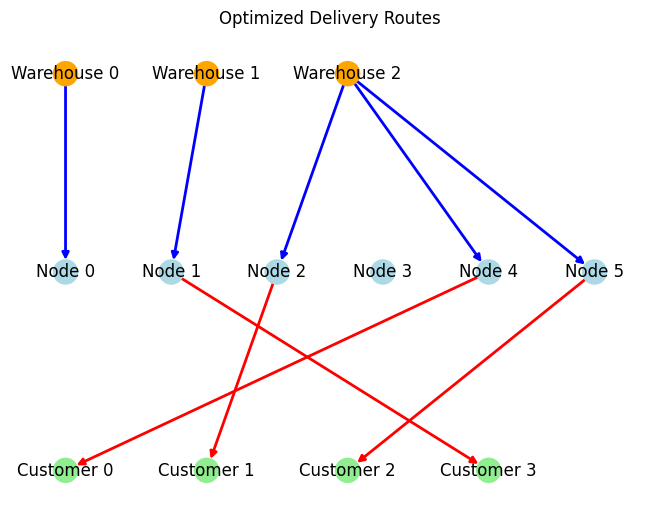

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt

# Constants for number of warehouses, nodes, and customers
num_warehouses = 3
num_nodes = 6
num_customers = 4

# Cost matrices (using dictionaries to simulate matrices for simplicity)
CTruckik = {
    (0, 0): 0, (0, 1): 10, (0, 2): 15, (0, 3): 20, (0, 4): 25, (0, 5): 30,
    (1, 0): 10, (1, 1): 0, (1, 2): 12, (1, 3): 18, (1, 4): 22, (1, 5): 27,
    (2, 0): 20, (2, 1): 12, (2, 2): 0, (2, 3): 15, (2, 4): 18, (2, 5): 20
}
CDronekj = {
    (0, 0): 35, (0, 1): 40, (0, 2): 45, (0, 3): 50,
    (1, 0): 30, (1, 1): 32, (1, 2): 34, (1, 3): 36,
    (2, 0): 25, (2, 1): 27, (2, 2): 29, (2, 3): 31,
    (3, 0): 20, (3, 1): 21, (3, 2): 23, (3, 3): 25,
    (4, 0): 15, (4, 1): 17, (4, 2): 19, (4, 3): 21,
    (5, 0): 10, (5, 1): 12, (5, 2): 14, (5, 3): 16
}

# Initialize the Gurobi model
m = gp.Model("Hybrid Delivery Optimization")

# Define decision variables
x = m.addVars(num_warehouses, num_nodes, vtype=GRB.BINARY, name="x")
d = m.addVars(num_nodes, num_customers, vtype=GRB.BINARY, name="d")

# Set the objective function
m.setObjective(
    gp.quicksum(x[i, k] * CTruckik[(i, k)] for i in range(num_warehouses) for k in range(num_nodes)) +
    gp.quicksum(d[k, j] * CDronekj[(k, j)] for k in range(num_nodes) for j in range(num_customers)),
    sense=GRB.MINIMIZE)

# Define constraints
# Ensure each customer is served by exactly one route
for j in range(num_customers):
    m.addConstr(gp.quicksum(d[k, j] for k in range(num_nodes)) == 1, f"ServeCustomer{j}")

# Link truck and drone deployment
for k in range(num_nodes):
    m.addConstr(gp.quicksum(d[k, j] for j in range(num_customers)) <= gp.quicksum(x[i, k] for i in range(num_warehouses)),
                f"DroneDepFromNode{k}")

# Optimize the model
m.optimize()

# Plotting the solution
G = nx.DiGraph()

# Add nodes for warehouses, nodes, and customers
for i in range(num_warehouses):
    G.add_node(f"Warehouse {i}", pos=(i*2, 10), node_color='orange')
for k in range(num_nodes):
    G.add_node(f"Node {k}", pos=(k*1.5, 5), node_color='lightblue')
for j in range(num_customers):
    G.add_node(f"Customer {j}", pos=(j*2, 0), node_color='lightgreen')

# Add edges from the solution
for i in range(num_warehouses):
    for k in range(num_nodes):
        if x[i, k].x > 0.99:
            G.add_edge(f"Warehouse {i}", f"Node {k}", color='blue', weight=2)

for k in range(num_nodes):
    for j in range(num_customers):
        if d[k, j].x > 0.99:
            G.add_edge(f"Node {k}", f"Customer {j}", color='red', weight=2)

pos = nx.get_node_attributes(G, 'pos')
colors = [G[u][v]['color'] for u, v in G.edges]
weights = [G[u][v]['weight'] for u, v in G.edges]

# Draw the graph
nx.draw(G, pos, edge_color=colors, width=weights, with_labels=True, node_color=[data['node_color'] for node, data in G.nodes(data=True)])
plt.title('Optimized Delivery Routes')
plt.show()


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 8 rows, 50 columns and 36 nonzeros
Model fingerprint: 0x4126b280
Variable types: 0 continuous, 50 integer (50 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 118.0000000
Presolve removed 0 rows and 30 columns
Presolve time: 0.00s
Presolved: 8 rows, 20 columns, 36 nonzeros
Variable types: 0 continuous, 20 integer (20 binary)

Root relaxation: cutoff, 12 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0       11

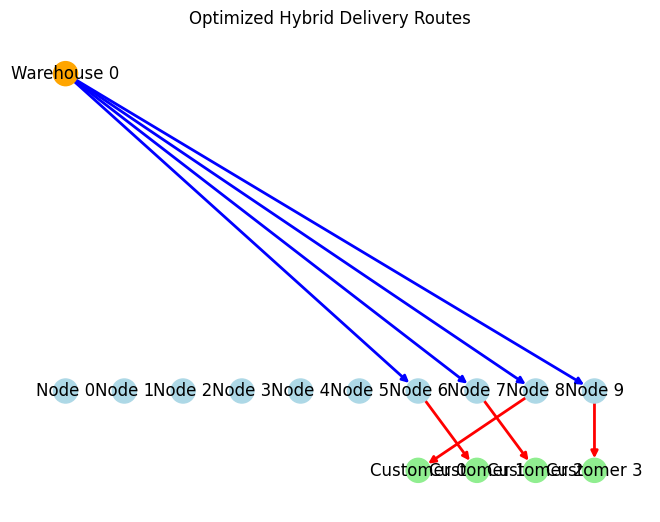

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt

# Constants for the number of nodes and customers
num_warehouses = 1
num_nodes = 10
num_customers = 4

# Define cost matrices for truck and drone using dummy data
# Cost matrix for truck from warehouse 0 to all nodes
CTruckik = {(0, k): 5 + abs(k - 5) for k in range(num_nodes)}  # Simplified cost based on distance
# Cost matrix for drone from nodes to customer locations (assume last 4 nodes are customers)
CDronekj = {(k, j): 2 * abs(k - j) + 10 for k in range(num_nodes - num_customers, num_nodes) for j in range(num_customers)}

# Initialize the Gurobi model
m = gp.Model("Hybrid Delivery Optimization")

# Define decision variables
x = m.addVars(num_warehouses, num_nodes, vtype=GRB.BINARY, name="x")
d = m.addVars(num_nodes, num_customers, vtype=GRB.BINARY, name="d")

# Set the objective function
m.setObjective(
    gp.quicksum(x[0, k] * CTruckik[0, k] for k in range(num_nodes)) +
    gp.quicksum(d[k, j] * CDronekj[k, j] for k in range(num_nodes - num_customers, num_nodes) for j in range(num_customers)),
    sense=GRB.MINIMIZE)

# Define constraints
# Ensure each customer is served by exactly one route
for j in range(num_customers):
    m.addConstr(gp.quicksum(d[k, j] for k in range(num_nodes - num_customers, num_nodes)) == 1, f"ServeCustomer{j}")

# Link truck and drone deployment
for k in range(num_nodes - num_customers, num_nodes):
    m.addConstr(gp.quicksum(d[k, j] for j in range(num_customers)) <= x[0, k], f"DroneDepFromNode{k}")

# Optimize the model
m.optimize()

# Create a directed graph for visualization
G = nx.DiGraph()

# Add nodes for the warehouse, nodes, and customers
G.add_node("Warehouse 0", pos=(0, 10), node_color='orange')
for k in range(num_nodes):
    G.add_node(f"Node {k}", pos=(k, 2), node_color='lightblue')
for j in range(num_customers):
    G.add_node(f"Customer {j}", pos=(num_nodes - num_customers + j, 0), node_color='lightgreen')

# Add edges from the solution
for k in range(num_nodes):
    if x[0, k].x > 0.99:
        G.add_edge("Warehouse 0", f"Node {k}", color='blue', weight=2)
for k in range(num_nodes - num_customers, num_nodes):
    for j in range(num_customers):
        if d[k, j].x > 0.99:
            G.add_edge(f"Node {k}", f"Customer {j}", color='red', weight=2)

pos = nx.get_node_attributes(G, 'pos')
colors = [G[u][v]['color'] for u, v in G.edges]
weights = [G[u][v]['weight'] for u, v in G.edges]

# Draw the graph
nx.draw(G, pos, edge_color=colors, width=weights, with_labels=True, node_color=[data['node_color'] for node, data in G.nodes(data=True)])
plt.title('Optimized Hybrid Delivery Routes')
plt.show()


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 7 rows, 16 columns and 101 nonzeros
Model fingerprint: 0x008010a3
Variable types: 0 continuous, 16 integer (16 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 17.0000000
Presolve removed 7 rows and 16 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.05 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 7 17 

Optimal solution found (tolerance 1.00e-04)
Best objective 7.000000000000e+00, best bound 7.000000000000e+00, gap 0.0000%


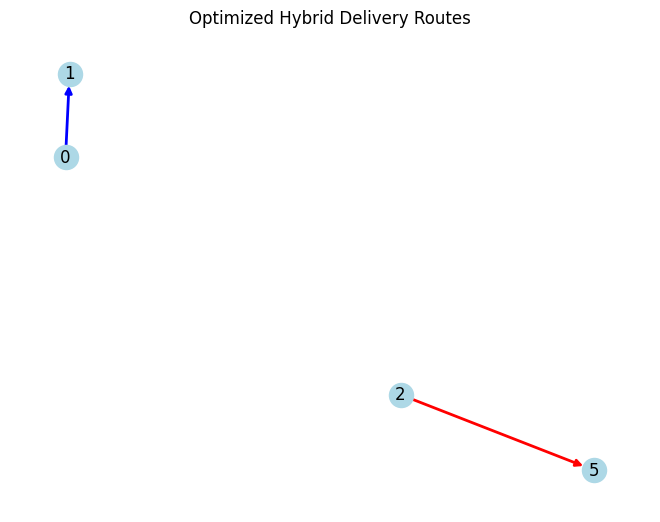

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt

# Given edges with costs for truck and drone paths
truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
drone_path_edges = [(0, 5, 12), (4, 5, 9), (3, 5, 7), (1, 5, 10), (2, 5, 6), (0, 4, 2), (0, 1, 4), (2, 4, 12), (0, 2, 6)]

# Convert edges into cost dictionaries for truck and drone
CTruck = {(i, j): cost for (i, j, cost) in truck_path_edges}
CDrone = {(i, j): cost for (i, j, cost) in drone_path_edges}

# Initialize the Gurobi model
m = gp.Model("Hybrid Delivery Optimization")

# Define decision variables for truck and drone paths
x = m.addVars([(i, j) for i, j, _ in truck_path_edges], vtype=GRB.BINARY, name="x_truck")
d = m.addVars([(i, j) for i, j, _ in drone_path_edges], vtype=GRB.BINARY, name="d_drone")

# Objective function to minimize total cost of paths
m.setObjective(
    gp.quicksum(x[i, j] * CTruck[i, j] for (i, j) in x.keys()) +
    gp.quicksum(d[i, j] * CDrone[i, j] for (i, j) in d.keys()),
    sense=GRB.MINIMIZE)

# Define constraints
# Ensure truck paths and drone paths are linked correctly
for j in range(max(max(i, j) for i, j, cost in truck_path_edges + drone_path_edges) + 1):
    m.addConstr(gp.quicksum(x[(i, j)] for i, j in x.keys() if j == j) >=
                gp.quicksum(d[(j, k)] for j, k in d.keys() if j == j), f"link_{j}")

# Ensure customer node is served by a drone
m.addConstr(gp.quicksum(d[(i, 5)] for i, j in d.keys() if j == 5) == 1, "ServeCustomer")

# Optimize model
m.optimize()

# Create a directed graph for visualization
G = nx.DiGraph()

# Add nodes and edges with colors based on the solution
for i, j, _ in truck_path_edges:
    if x[(i, j)].X > 0.99:  # Gurobi uses .X for solution values
        G.add_edge(i, j, color='blue', weight=2)
for i, j, _ in drone_path_edges:
    if d[(i, j)].X > 0.99:
        G.add_edge(i, j, color='red', weight=2)

# Layout for better visualization, using spring layout to spread nodes visually
pos = nx.spring_layout(G)
colors = [G[u][v]['color'] for u, v in G.edges]
weights = [G[u][v]['weight'] for u, v in G.edges]

# Draw the graph
nx.draw(G, pos, edge_color=colors, width=weights, with_labels=True, node_color='lightblue')
plt.title('Optimized Hybrid Delivery Routes')
plt.show()


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 6 rows, 12 columns and 12 nonzeros
Model fingerprint: 0x27fe2d77
Variable types: 0 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 21.0000000
Presolve removed 6 rows and 12 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 13 21 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.300000000000e+01, best bound 1.300000000000e+01, gap 0.0000%


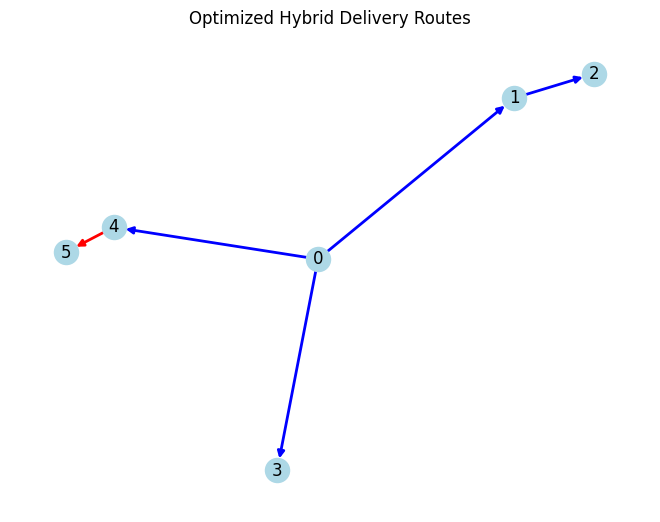

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt

# Edges with costs for truck and drone paths
truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
drone_path_edges = [(0, 5, 12), (4, 5, 4), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# Initialize the Gurobi model
m = gp.Model("Hybrid Delivery Optimization")

# Define decision variables for truck and drone paths
x = m.addVars(truck_path_edges, vtype=GRB.BINARY, name="x_truck")
d = m.addVars(drone_path_edges, vtype=GRB.BINARY, name="d_drone")

# Objective function to minimize total cost
m.setObjective(
    gp.quicksum(x[i, j, cost] * cost for i, j, cost in truck_path_edges) +
    gp.quicksum(d[i, j, cost] * cost for i, j, cost in drone_path_edges),
    sense=GRB.MINIMIZE)

# Ensure the truck delivers to exactly one intermediate node
m.addConstrs(x.sum('*', j) == 1 for j in set(j for i, j, cost in truck_path_edges if j != 5))

# Ensure the drone delivers from one intermediate node to the final location
m.addConstr(d.sum('*', 5) == 1)

# Ensure that the drone only launches from a node that the truck has reached
for j in set(j for i, j, cost in drone_path_edges if j == 5):
    m.addConstr(d.sum(j, 5) <= x.sum('*', j))

# Optimize model
m.optimize()

# Visualization
G = nx.DiGraph()

# Add nodes and edges with colors based on the solution
for i, j, cost in truck_path_edges:
    if x[i, j, cost].X > 0.99:  # Check if the edge is in the solution
        G.add_edge(i, j, color='blue', weight=2)
for i, j, cost in drone_path_edges:
    if d[i, j, cost].X > 0.99:  # Check if the edge is in the solution
        G.add_edge(i, j, color='red', weight=2)

pos = nx.spring_layout(G)
colors = [G[u][v]['color'] for u, v in G.edges]
weights = [G[u][v]['weight'] for u, v in G.edges]

nx.draw(G, pos, edge_color=colors, width=weights, with_labels=True, node_color='lightblue')
plt.title('Optimized Hybrid Delivery Routes')
plt.show()


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 7 rows, 12 columns and 19 nonzeros
Model fingerprint: 0xb4b04bb2
Variable types: 0 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 11.0000000
Presolve removed 7 rows and 12 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 7 11 

Optimal solution found (tolerance 1.00e-04)
Best objective 7.000000000000e+00, best bound 7.000000000000e+00, gap 0.0000%
Model solved optimally.
Truck Path: 0->4
Drone Pa

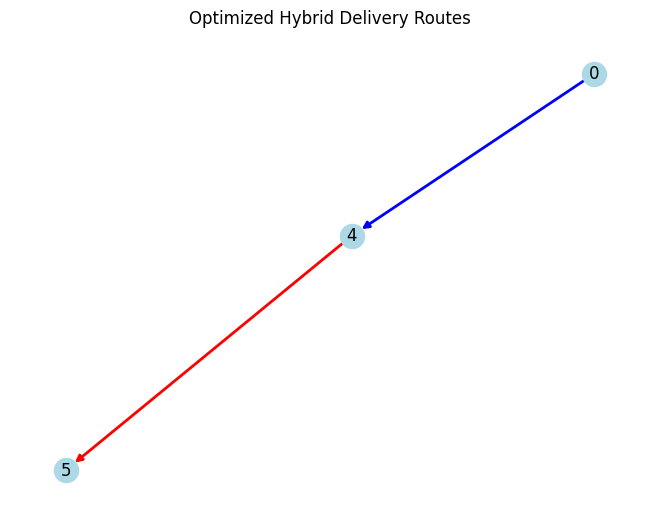

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt

# Edges with costs for truck and drone paths
truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
drone_path_edges = [(0, 5, 12), (4, 5, 4), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# Initialize the Gurobi model
m = gp.Model("Hybrid Delivery Optimization")

# Define decision variables for truck and drone paths
x = m.addVars(truck_path_edges, vtype=GRB.BINARY, name="x_truck")
d = m.addVars(drone_path_edges, vtype=GRB.BINARY, name="d_drone")

# Objective function to minimize total cost
m.setObjective(
    gp.quicksum(x[i, j, cost] * cost for i, j, cost in truck_path_edges) +
    gp.quicksum(d[i, j, cost] * cost for i, j, cost in drone_path_edges),
    sense=GRB.MINIMIZE)

# Ensure truck delivers to exactly one intermediate node
m.addConstr(x.sum(0, '*') == 1, "StartWarehouse")  # Only one truck path starts from the warehouse

# Ensure drone path starts from a node reached by truck and ends at the delivery location
m.addConstr(d.sum('*', 5) == 1, "EndDelivery")  # One drone delivers to the final location

# Intermediate connection (truck to drone)
m.addConstrs((x.sum('*', j) == d.sum(j, 5) for j in set(j for i, j, cost in truck_path_edges)), "TruckToDrone")

# Optimize model
m.optimize()

# Check if the model has an optimal solution
if m.status == GRB.OPTIMAL:
    print("Model solved optimally.")
    # Extract and print paths
    truck_path = ' -> '.join(f"{i}->{j}" for i, j, cost in truck_path_edges if x[i, j, cost].X > 0.99)
    drone_path = ' -> '.join(f"{i}->{j}" for i, j, cost in drone_path_edges if d[i, j, cost].X > 0.99)
    print("Truck Path:", truck_path)
    print("Drone Path:", drone_path)

    # Visualization
    G = nx.DiGraph()
    for i, j, cost in truck_path_edges:
        if x[i, j, cost].X > 0.99:
            G.add_edge(i, j, color='blue', weight=2)
    for i, j, cost in drone_path_edges:
        if d[i, j, cost].X > 0.99:
            G.add_edge(i, j, color='red', weight=2)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, edge_color=[G[u][v]['color'] for u, v in G.edges], width=[G[u][v]['weight'] for u, v in G.edges], with_labels=True, node_color='lightblue')
    plt.title('Optimized Hybrid Delivery Routes')
    plt.show()
else:
    print("No optimal solution found or model is infeasible.")


In [ ]:
pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 39.2 MB/s eta 0:00:00


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 7 rows, 12 columns and 19 nonzeros
Model fingerprint: 0xaebda20c
Variable types: 0 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 15.0000000
Presolve removed 7 rows and 12 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 7 15 

Optimal solution found (tolerance 1.00e-04)
Best objective 7.000000000000e+00, best bound 7.000000000000e+00, gap 0.0000%
Model solved optimally.
Truck Path: 0->4
Drone Pa

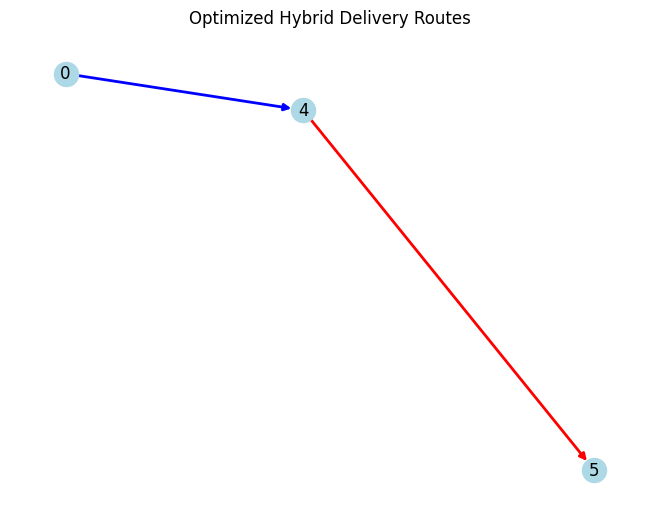

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt

# Edges with costs for truck and drone paths
truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
drone_path_edges = [(0, 5, 12), (4, 5, 4), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# Initialize the Gurobi model
m = gp.Model("Hybrid Delivery Optimization")

# Define decision variables for truck and drone paths
x = m.addVars(truck_path_edges, vtype=GRB.BINARY, name="x_truck")
d = m.addVars(drone_path_edges, vtype=GRB.BINARY, name="d_drone")

# Objective function to minimize total cost
m.setObjective(
    gp.quicksum(x[i, j, cost] * cost for i, j, cost in truck_path_edges) +
    gp.quicksum(d[i, j, cost] * cost for i, j, cost in drone_path_edges),
    sense=GRB.MINIMIZE)

# Ensure truck delivers to exactly one intermediate node
m.addConstr(x.sum(0, '*') == 1, "StartWarehouse")  # Only one truck path starts from the warehouse

# Ensure drone path starts from a node reached by truck and ends at the delivery location
m.addConstr(d.sum('*', 5) == 1, "EndDelivery")  # One or fewer drones deliver to the final location

# Intermediate connection (truck to drone)
m.addConstrs((x.sum('*', j) >= d.sum(j, 5) for j in set(j for i, j, cost in truck_path_edges)), "TruckToDrone")

# Optimize model
m.optimize()

# Check if the model has an optimal solution
if m.status == GRB.OPTIMAL:
    print("Model solved optimally.")
    # Extract and print paths
    truck_path = ' -> '.join(f"{i}->{j}" for i, j, cost in truck_path_edges if x[i, j, cost].X > 0.99)
    drone_path = ' -> '.join(f"{i}->{j}" for i, j, cost in drone_path_edges if d[i, j, cost].X > 0.99)
    print("Truck Path:", truck_path)
    print("Drone Path:", drone_path)

    # Visualization
    G = nx.DiGraph()
    for i, j, cost in truck_path_edges:
        if x[i, j, cost].X > 0.99:
            G.add_edge(i, j, color='blue', weight=2)
    for i, j, cost in drone_path_edges:
        if d[i, j, cost].X > 0.99:
            G.add_edge(i, j, color='red', weight=2)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, edge_color=[G[u][v]['color'] for u, v in G.edges], width=[G[u][v]['weight'] for u, v in G.edges], with_labels=True, node_color='lightblue')
    plt.title('Optimized Hybrid Delivery Routes')
    plt.show()
else:
    print("No optimal solution found or model is infeasible.")


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 12 rows, 32 columns and 56 nonzeros
Model fingerprint: 0x8e466e17
Variable types: 0 continuous, 32 integer (32 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 26.0000000
Presolve removed 12 rows and 32 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 17 26 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
Model solved optimally.
Truck Path: 0->1 -> 1-

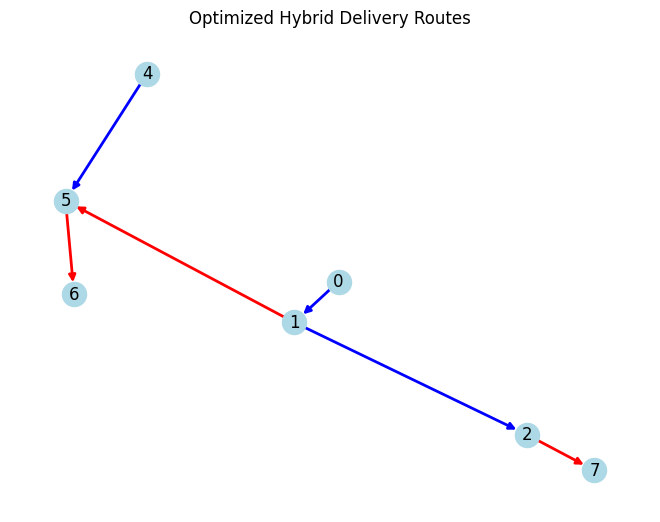

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt
import random

# Initialize node range
nodes = range(8)  # Nodes 0 to 7

# Define truck paths (static as per your structure)
truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]

# Generate drone paths with random costs between any pair of nodes
drone_path_edges = [(i, j, random.randint(1, 10)) for i in nodes for j in nodes if i != j and (i == 0 or j in {5, 6, 7})]

# Define delivery locations
delivery_locations = [5, 6, 7]  # Assume new delivery locations are nodes 5, 6, 7

# Initialize the Gurobi model
m = gp.Model("Hybrid Delivery Optimization")

# Decision variables for truck and drone paths
x = m.addVars(truck_path_edges, vtype=GRB.BINARY, name="x_truck")
d = m.addVars(drone_path_edges, vtype=GRB.BINARY, name="d_drone")

# Objective function to minimize total cost
m.setObjective(
    gp.quicksum(x[i, j, cost] * cost for i, j, cost in truck_path_edges) +
    gp.quicksum(d[i, j, cost] * cost for i, j, cost in drone_path_edges),
    sense=GRB.MINIMIZE)

# Constraints
# Ensure exactly one truck path starts from the warehouse (node 0)
m.addConstr(x.sum(0, '*', '*') == 1, "StartWarehouse")

# Ensure drone deliveries to each delivery location
for loc in delivery_locations:
    m.addConstr(d.sum('*', loc, '*') == 1, f"EndDelivery_{loc}")

# Intermediate connection (truck to drone)
# A drone can start its delivery from any node reached by the truck
for j in nodes:
    m.addConstr(x.sum('*', j, '*') >= d.sum(j, '*', '*'), f"TruckToDrone_{j}")

# Optimize model
m.optimize()

# Check if the model has an optimal solution
if m.status == GRB.OPTIMAL:
    print("Model solved optimally.")
    # Extract and print paths
    truck_path = ' -> '.join(f"{i}->{j}" for i, j, cost in truck_path_edges if x[i, j, cost].X > 0.99)
    print("Truck Path:", truck_path)
    for loc in delivery_locations:
        drone_path = ' -> '.join(f"{i}->{j}" for i, j, cost in drone_path_edges if j == loc and d[i, j, cost].X > 0.99)
        print(f"Drone Path to {loc}:", drone_path)

    # Visualization
    G = nx.DiGraph()

    # Add nodes and edges with colors based on the solution
    for i, j, cost in truck_path_edges:
        if x[i, j, cost].X > 0.99:
            G.add_edge(i, j, color='blue', weight=2)
    for i, j, cost in drone_path_edges:
        if d[i, j, cost].X > 0.99:
            G.add_edge(i, j, color='red', weight=2)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, edge_color=[G[u][v]['color'] for u, v in G.edges], width=[G[u][v]['weight'] for u, v in G.edges], with_labels=True, node_color='lightblue')
    plt.title('Optimized Hybrid Delivery Routes')
    plt.show()
else:
    print("No optimal solution found or model is infeasible.")


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 9 rows, 18 columns and 28 nonzeros
Model fingerprint: 0x546203d8
Variable types: 0 continuous, 18 integer (18 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 24.0000000
Presolve removed 9 rows and 18 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 21 24 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.100000000000e+01, best bound 2.100000000000e+01, gap 0.0000%
Model solved optimally.
Truck Path: 0->3
Drone P

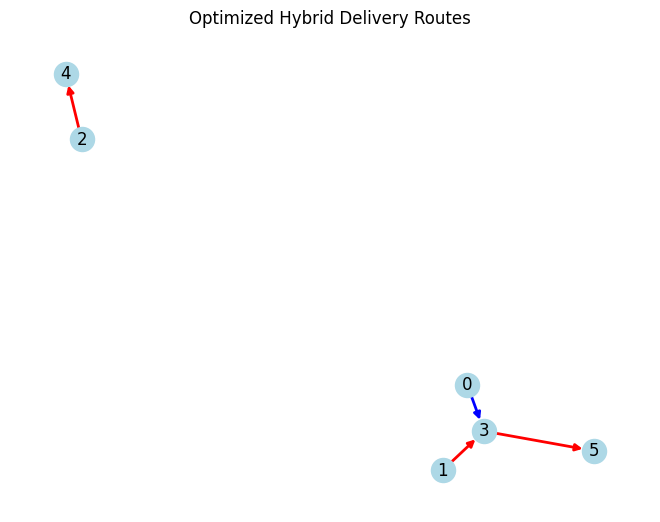

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt

# Edges with costs for truck and drone paths
truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 10), (4, 5, 5)]
drone_path_edges = [(0, 5, 12), (4, 5, 4), (3, 5, 10), (1, 5, 12), (2, 5, 6),
                    (0, 3, 10), (0, 4, 10), (1, 3, 4), (1, 4, 6), (2, 3, 8), (2, 4, 5)]

# Initialize the Gurobi model
m = gp.Model("Hybrid Delivery Optimization")

# Define decision variables for truck and drone paths
x = m.addVars(truck_path_edges, vtype=GRB.BINARY, name="x_truck")
d = m.addVars(drone_path_edges, vtype=GRB.BINARY, name="d_drone")

# Objective function to minimize total cost
m.setObjective(
    gp.quicksum(x[i, j, cost] * cost for i, j, cost in truck_path_edges) +
    gp.quicksum(d[i, j, cost] * cost for i, j, cost in drone_path_edges),
    sense=GRB.MINIMIZE)

# Ensure truck delivers to exactly one intermediate node, considering drone cost
m.addConstr(x.sum(0, '*') + d.sum(0, '*') == 1, "StartWarehouse")  # Either truck or drone delivers from the warehouse


# Ensure drone path starts from a node reached by truck and ends at a delivery location
m.addConstrs((d.sum('*', j) == 1 for j in [3, 4, 5]), "EndDelivery")  # One drone delivers to each delivery location

# Intermediate connection (truck to drone)
m.addConstrs((x.sum('*', j) == d.sum(j, 5) for j in set(j for i, j, cost in truck_path_edges)), "TruckToDrone")

# Optimize model
m.optimize()

# Check if the model has an optimal solution
if m.status == GRB.OPTIMAL:
    print("Model solved optimally.")
    # Extract and print paths
    truck_path = ' -> '.join(f"{i}->{j}" for i, j, cost in truck_path_edges if x[i, j, cost].X > 0.99)
    drone_path = ' -> '.join(f"{i}->{j}" for i, j, cost in drone_path_edges if d[i, j, cost].X > 0.99)
    print("Truck Path:", truck_path)
    print("Drone Path:", drone_path)

    # Visualization
    G = nx.DiGraph()
    for i, j, cost in truck_path_edges:
        if x[i, j, cost].X > 0.99:
            G.add_edge(i, j, color='blue', weight=2)
    for i, j, cost in drone_path_edges:
        if d[i, j, cost].X > 0.99:
            G.add_edge(i, j, color='red', weight=2)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, edge_color=[G[u][v]['color'] for u, v in G.edges], width=[G[u][v]['weight'] for u, v in G.edges], with_labels=True, node_color='lightblue')
    plt.title('Optimized Hybrid Delivery Routes')
    plt.show()
else:
    print("No optimal solution found or model is infeasible.")


In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Edges with costs for truck and drone paths
truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
drone_path_edges = [(0, 5, 12), (4, 5, 4), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# Initialize the Gurobi model
m = gp.Model("Hybrid Delivery Optimization")

# Define decision variables for truck and drone paths
x = m.addVars(truck_path_edges, vtype=GRB.BINARY, name="x_truck")
d = m.addVars(drone_path_edges, vtype=GRB.BINARY, name="d_drone")

# Objective function to minimize total cost
m.setObjective(
    gp.quicksum(x[i, j, cost] * cost for i, j, cost in truck_path_edges) +
    gp.quicksum(d[i, j, cost] * cost for i, j, cost in drone_path_edges),
    sense=GRB.MINIMIZE)

# Constraint: Only one type of delivery method (truck or drone) should be used
m.addConstr(x.sum() + d.sum() == 1, "OneDeliveryMethod")

# Constraint: Truck must deliver to a node before drone can be launched from it
m.addConstrs((x.sum('*', j) >= d.sum(j, '*') for j in set(j for i, j, cost in drone_path_edges)), "TruckToDrone")

# Constraint: Only one truck path starts from the warehouse
m.addConstr(x.sum(0, '*') == 1, "StartWarehouse")

# Constraint: Truck or drone must deliver to node 5
m.addConstr(x.sum('*', 5) + d.sum('*', 5) == 1, "DeliveryRequirement")

# Optimize model
m.optimize()

# Check and display results
if m.status == GRB.OPTIMAL:
    print("Model solved optimally.")
    # Extract and print paths
    truck_path = ', '.join(f"{i}->{j}" for i, j, cost in truck_path_edges if x[i, j, cost].X > 0.99)
    drone_path = ', '.join(f"{i}->{j}" for i, j, cost in drone_path_edges if d[i, j, cost].X > 0.99)
    print("Truck Path:", truck_path)
    print("Drone Path:", drone_path)
else:
    print("No optimal solution found or model is infeasible.")


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 3 rows, 12 columns and 23 nonzeros
Model fingerprint: 0xf86e221d
Variable types: 0 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 9 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No optimal solution found or model is infeasible.


In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt

# truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
# drone_path_edges = [(0, 5, 12), (4, 5, 5), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# # Create truck graph
# truck_G = nx.Graph()
# truck_G.add_weighted_edges_from(truck_path_edges)

# # Create drone graph
# drone_G = nx.Graph()
# drone_G.add_weighted_edges_from(drone_path_edges)

# # Plot individual truck graph
# plt.figure(figsize=(12, 4))
# plt.subplot(121)
# pos_truck = nx.spring_layout(truck_G)
# nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
# nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
# plt.title("Truck Graph")

# # Plot individual drone graph
# plt.subplot(122)
# pos_drone = nx.spring_layout(drone_G)
# nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
# nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
# plt.title("Drone Graph")

# plt.tight_layout()
# plt.show()

# # Plot the combined graph
# combined_G = nx.compose(truck_G, drone_G)
# plt.figure(figsize=(8, 6))
# pos_combined = nx.spring_layout(combined_G)
# nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
# nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
# plt.title("Combined Graph")

# # Calculate the total cost of the combined graph
# total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=5, weight='weight')
# print("Total cost (Combined):", total_cost_combined)

# # Find and print the minimum cost path in the combined graph
# min_cost_path_combined = nx.shortest_path(combined_G, source=0, target=5, weight='weight')
# print("Minimum cost path (Combined):", min_cost_path_combined)

# # Extract the edges and their weights for the truck path in the combined graph
# truck_path_edges_combined = [(min_cost_path_combined[i], min_cost_path_combined[i + 1]) for i in range(len(min_cost_path_combined) - 1)]
# truck_path_weights_combined = [combined_G[min_cost_path_combined[i]][min_cost_path_combined[i + 1]]['weight'] for i in range(len(min_cost_path_combined) - 1)]

# # Print the truck path and its weights
# print("Truck Path in Combined Graph:")
# for edge, weight in zip(truck_path_edges_combined, truck_path_weights_combined):
#     print(f"Edge: {edge}, Weight: {weight}")

# # Extract the edges and their weights for the drone path in the combined graph
# drone_path_edges_combined = [(min_cost_path_combined[i], min_cost_path_combined[i + 1]) for i in range(len(min_cost_path_combined) - 1)]
# drone_path_weights_combined = [combined_G[min_cost_path_combined[i]][min_cost_path_combined[i + 1]]['weight'] for i in range(len(min_cost_path_combined) - 1)]

# # Print the drone path and its weights
# print("Drone Path in Combined Graph:")
# for edge, weight in zip(drone_path_edges_combined, drone_path_weights_combined):
#     print(f"Edge: {edge}, Weight: {weight}")


# plt.show()


In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt

# truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 9)]
# drone_path_edges = [(0, 5, 12), (4, 5, 5), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# # Create truck graph
# truck_G = nx.Graph()
# truck_G.add_weighted_edges_from(truck_path_edges)

# # Create drone graph
# drone_G = nx.Graph()
# drone_G.add_weighted_edges_from(drone_path_edges)

# # Plot individual truck graph
# plt.figure(figsize=(12, 4))
# plt.subplot(121)
# pos_truck = nx.spring_layout(truck_G)
# nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
# nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
# plt.title("Truck Graph")

# # Plot individual drone graph
# plt.subplot(122)
# pos_drone = nx.spring_layout(drone_G)
# nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
# nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
# plt.title("Drone Graph")

# plt.tight_layout()
# plt.show()

# # Plot the combined graph
# combined_G = nx.compose(truck_G, drone_G)
# plt.figure(figsize=(8, 6))
# pos_combined = nx.spring_layout(combined_G)
# nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
# nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
# plt.title("Combined Graph")

# # Calculate the total cost of the combined graph
# total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=5, weight='weight')
# print("Total cost (Combined):", total_cost_combined)

# # Find and print the minimum cost path in the combined graph
# min_cost_path_combined = nx.shortest_path(combined_G, source=0, target=5, weight='weight')
# print("Minimum cost path (Combined):", min_cost_path_combined)

# # Find the path covered by the truck in the combined graph
# truck_path_combined = [(min_cost_path_combined[i], min_cost_path_combined[i+1]) for i in range(len(min_cost_path_combined)-1) if (min_cost_path_combined[i], min_cost_path_combined[i+1]) in truck_G.edges]
# print("Path covered by truck in combined graph:", truck_path_combined)

# # Find the path covered by the drone in the combined graph
# drone_path_combined = [(min_cost_path_combined[i], min_cost_path_combined[i+1]) for i in range(len(min_cost_path_combined)-1) if (min_cost_path_combined[i], min_cost_path_combined[i+1]) in drone_G.edges]
# print("Path covered by drone in combined graph:", drone_path_combined)


# plt.show()


In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt

# truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
# drone_path_edges = [(0, 5, 12), (4, 5, 4), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# # Create truck graph
# truck_G = nx.Graph()
# truck_G.add_weighted_edges_from(truck_path_edges)

# # Create drone graph
# drone_G = nx.Graph()
# drone_G.add_weighted_edges_from(drone_path_edges)

# # Plot individual truck graph
# plt.figure(figsize=(12, 4))
# plt.subplot(121)
# pos_truck = nx.spring_layout(truck_G)
# nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
# nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
# plt.title("Truck Graph")

# # Plot individual drone graph
# plt.subplot(122)
# pos_drone = nx.spring_layout(drone_G)
# nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
# nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
# plt.title("Drone Graph")

# plt.tight_layout()
# plt.show()

# # Plot the combined graph
# combined_G = nx.compose(truck_G, drone_G)
# plt.figure(figsize=(8, 6))
# pos_combined = nx.spring_layout(combined_G)
# nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
# nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
# plt.title("Combined Graph")

# # Calculate the total cost of the combined graph
# total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=5, weight='weight')
# print("Total cost (Combined):", total_cost_combined)

# # Find and print the minimum cost path in the combined graph
# min_cost_path_combined = nx.shortest_path(combined_G, source=0, target=5, weight='weight')
# print("Minimum cost path (Combined):", min_cost_path_combined)

# truck_path_combined = []
# for i in range(len(min_cost_path_combined) - 1):
#     edge = (min_cost_path_combined[i], min_cost_path_combined[i + 1])
#     if edge in truck_G.edges:
#         weight_truck = truck_G[edge[0]][edge[1]]['weight']
#         weight_combined = combined_G[edge[0]][edge[1]]['weight']
#         if weight_truck == weight_combined:
#             truck_path_combined.append((edge, weight_truck))

# print("Path covered by truck in combined graph:")
# for (edge, weight) in truck_path_combined:
#     print(f"Edge: {edge}, Weight (Truck): {weight}")

# drone_path_combined = []
# for i in range(len(min_cost_path_combined) - 1):
#     edge = (min_cost_path_combined[i], min_cost_path_combined[i + 1])
#     if edge in drone_G.edges:
#         weight_drone = drone_G[edge[0]][edge[1]]['weight']
#         weight_combined = combined_G[edge[0]][edge[1]]['weight']
#         if weight_drone == weight_combined:
#             drone_path_combined.append((edge, weight_drone))

# print("Path covered by drone in combined graph:")
# for (edge, weight) in drone_path_combined:
#     print(f"Edge: {edge}, Weight (Drone): {weight}")


# plt.show()


In [ ]:
pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 41.5 MB/s eta 0:00:00


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 2 columns and 2 nonzeros
Model fingerprint: 0xe528a52d
Variable types: 0 continuous, 2 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 9.0000000
Presolve removed 1 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 1: 9 

Optimal solution found (tolerance 1.00e-04)
Best objective 9.000000000000e+00, best bound 9.000000000000e+00, gap 0.0000%
Use truck for the entire route.


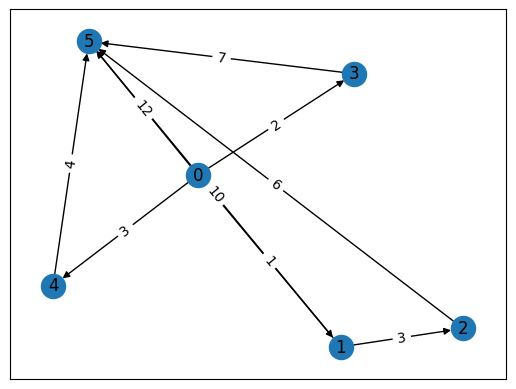

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt

# Edges with costs for truck and drone paths
truck_path_edges = [[0, 1, 1], [1, 2, 3], [2, 5, 6], [0, 3, 2], [3, 5, 7], [0, 4, 3], [4, 5, 5]]
drone_path_edges = [[0, 5, 12], [4, 5, 4], [3, 5, 7], [1, 5, 10], [2, 5, 6]]

# Create directed graph
G = nx.DiGraph()

# Add truck path edges to the graph
for edge in truck_path_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], vehicle='truck')

# Add drone path edges to the graph
for edge in drone_path_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], vehicle='drone')

# Create the optimization model
m = gp.Model('hybrid_delivery')

# Decision variables
truck = m.addVar(vtype=GRB.BINARY, name="truck")
drone = m.addVar(vtype=GRB.BINARY, name="drone")

# Objective function: minimize total cost
m.setObjective(truck * sum(G.edges[edge]['weight'] for edge in G.edges() if G.edges[edge]['vehicle'] == 'truck') +
               drone * sum(G.edges[edge]['weight'] for edge in G.edges() if G.edges[edge]['vehicle'] == 'drone'), GRB.MINIMIZE)

# Constraints
# 1. If truck is used, drone cannot be used and vice versa
m.addConstr(truck + drone == 1, "truck_or_drone")

# Solve the optimization model
m.optimize()

# Extract and print solution
if truck.x > 0.5:
    print("Use truck for the entire route.")
elif drone.x > 0.5:
    print("Use drone for the entire route.")

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = {(u, v): f"{G.edges[u, v]['weight']}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 4 rows, 1 columns and 4 nonzeros
Model fingerprint: 0x95fe4b69
Variable types: 0 continuous, 1 integer (1 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 39.0000000
Presolve removed 4 rows and 1 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.09 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 1: 39 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.900000000000e+01, best bound 3.900000000000e+01, gap 0.0000%
Use truck up to an intermediate node and then switch to 

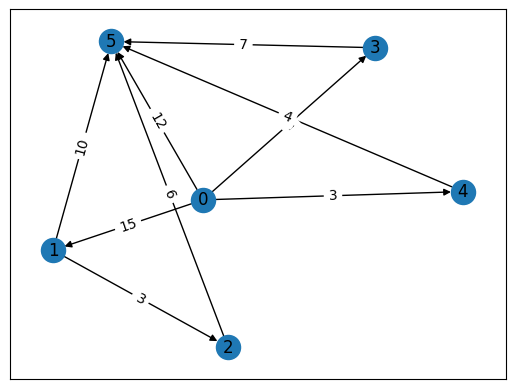

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt

# Edges with costs for truck and drone paths
truck_path_edges = [[0, 1, 15], [1, 2, 3], [2, 5, 6], [0, 3, 2], [3, 5, 7], [0, 4, 3], [4, 5, 5]]
drone_path_edges = [[0, 5, 12], [4, 5, 4], [3, 5, 7], [1, 5, 10], [2, 5, 6]]

# Create directed graph
G = nx.DiGraph()

# Add truck path edges to the graph
for edge in truck_path_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], vehicle='truck')

# Add drone path edges to the graph
for edge in drone_path_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], vehicle='drone')

# Create the optimization model
m = gp.Model('hybrid_delivery')

# Decision variable
use_drone = m.addVar(vtype=GRB.BINARY, name="use_drone")

# Objective function: minimize total cost
m.setObjective(use_drone * sum(G.edges[edge]['weight'] for edge in G.edges() if G.edges[edge]['vehicle'] == 'drone'), GRB.MINIMIZE)

# Constraints
# 1. If the truck's combined cost from start to final node is greater than the drone's cost from an intermediate node to the final node, use the drone
for edge in truck_path_edges:
    if edge[1] == 5:  # Final destination
        continue
    if edge[2] + min(drone_edge[2] for drone_edge in drone_path_edges if drone_edge[0] == edge[1]) > \
            sum(drone_edge[2] for drone_edge in drone_path_edges if drone_edge[0] == 5):
        m.addConstr(use_drone >= 1, f"use_drone_at_{edge[1]}")

# Solve the optimization model
m.optimize()

# Extract and print solution
if use_drone.x > 0.5:
    print("Use truck up to an intermediate node and then switch to drone.")
else:
    print("Use truck for the entire route.")

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = {(u, v): f"{G.edges[u, v]['weight']}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 4 rows, 1 columns and 4 nonzeros
Model fingerprint: 0x95fe4b69
Variable types: 0 continuous, 1 integer (1 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 39.0000000
Presolve removed 4 rows and 1 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 1: 39 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.900000000000e+01, best bound 3.900000000000e+01, gap 0.0000%
Use truck up to an intermediate node and then switch to 

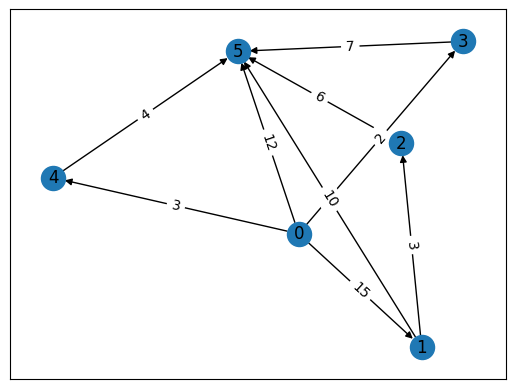

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt

# Edges with costs for truck and drone paths
truck_path_edges = [[0, 1, 15], [1, 2, 3], [2, 5, 6], [0, 3, 2], [3, 5, 7], [0, 4, 3], [4, 5, 5]]
drone_path_edges = [[0, 5, 12], [4, 5, 4], [3, 5, 7], [1, 5, 10], [2, 5, 6]]

# Create directed graph
G = nx.DiGraph()

# Add truck path edges to the graph
for edge in truck_path_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], vehicle='truck')

# Add drone path edges to the graph
for edge in drone_path_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], vehicle='drone')

# Create the optimization model
m = gp.Model('hybrid_delivery')

# Decision variable
use_drone = m.addVar(vtype=GRB.BINARY, name="use_drone")

# Objective function: minimize total cost
m.setObjective(use_drone * sum(G.edges[edge]['weight'] for edge in G.edges() if G.edges[edge]['vehicle'] == 'drone'), GRB.MINIMIZE)

# Constraints
# 1. If the truck's combined cost from start to final node is greater than the drone's cost from an intermediate node to the final node, use the drone
for edge in truck_path_edges:
    if edge[1] == 5:  # Final destination
        continue
    if edge[2] + min(drone_edge[2] for drone_edge in drone_path_edges if drone_edge[0] == edge[1]) > \
            sum(drone_edge[2] for drone_edge in drone_path_edges if drone_edge[0] == 5):
        m.addConstr(use_drone >= 1, f"use_drone_at_{edge[1]}")

# Solve the optimization model
m.optimize()

# Extract and print solution
if use_drone.x > 0.5:
    print("Use truck up to an intermediate node and then switch to drone.")
    truck_path = nx.shortest_path(G, source=0, target=1)
    drone_path = nx.shortest_path(G, source=1, target=5)
    total_cost = sum(G.edges[edge]['weight'] for edge in G.edges() if edge in [(truck_path[i], truck_path[i + 1]) for i in range(len(truck_path) - 1)]) + \
                 sum(G.edges[edge]['weight'] for edge in G.edges() if edge in [(drone_path[i], drone_path[i + 1]) for i in range(len(drone_path) - 1)])
else:
    print("Use truck for the entire route.")
    truck_path = nx.shortest_path(G, source=0, target=5)
    drone_path = []
    total_cost = sum(G.edges[edge]['weight'] for edge in G.edges() if edge in [(truck_path[i], truck_path[i + 1]) for i in range(len(truck_path) - 1)])

print("Truck Path:", truck_path)
print("Drone Path:", drone_path)
print("Total Cost:", total_cost)

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = {(u, v): f"{G.edges[u, v]['weight']}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 4 rows, 1 columns and 4 nonzeros
Model fingerprint: 0x95fe4b69
Variable types: 0 continuous, 1 integer (1 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 39.0000000
Presolve removed 4 rows and 1 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.08 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 1: 39 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.900000000000e+01, best bound 3.900000000000e+01, gap 0.0000%
Use truck up to an intermediate node and then switch to 

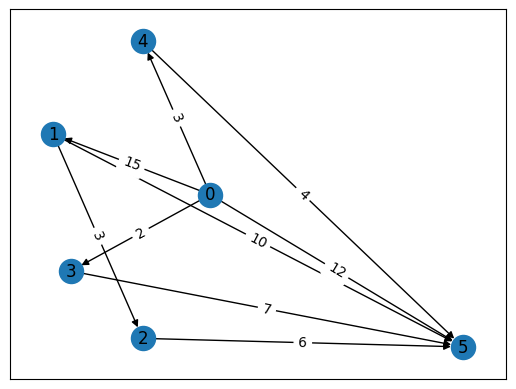

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt

# Edges with costs for truck and drone paths
truck_path_edges = [[0, 1, 15], [1, 2, 3], [2, 5, 6], [0, 3, 2], [3, 5, 7], [0, 4, 3], [4, 5, 5]]
drone_path_edges = [[0, 5, 12], [4, 5, 4], [3, 5, 7], [1, 5, 10], [2, 5, 6]]

# Create directed graph
G = nx.DiGraph()

# Add truck path edges to the graph
for edge in truck_path_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], vehicle='truck')

# Add drone path edges to the graph
for edge in drone_path_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], vehicle='drone')

# Create the optimization model
m = gp.Model('hybrid_delivery')

# Decision variable
use_drone = m.addVar(vtype=GRB.BINARY, name="use_drone")

# Objective function: minimize total cost
m.setObjective(use_drone * sum(G.edges[edge]['weight'] for edge in G.edges() if G.edges[edge]['vehicle'] == 'drone'), GRB.MINIMIZE)

# Constraints
# 1. If the truck's combined cost from start to final node is greater than the drone's cost from an intermediate node to the final node, use the drone
for edge in truck_path_edges:
    if edge[1] == 5:  # Final destination
        continue
    if edge[2] + min(drone_edge[2] for drone_edge in drone_path_edges if drone_edge[0] == edge[1]) > \
            sum(drone_edge[2] for drone_edge in drone_path_edges if drone_edge[0] == 5):
        m.addConstr(use_drone >= 1, f"use_drone_at_{edge[1]}")

# Solve the optimization model
m.optimize()

# Extract and print solution
if use_drone.x > 0.5:
    print("Use truck up to an intermediate node and then switch to drone.")
    truck_path = nx.shortest_path(G, source=0, target=1)
    drone_path = nx.shortest_path(G, source=1, target=5)
else:
    print("Use truck for the entire route.")
    truck_path = nx.shortest_path(G, source=0, target=5)
    drone_path = []

# Compute total costs
truck_cost = sum(G.edges[edge]['weight'] for edge in zip(truck_path[:-1], truck_path[1:]))
drone_cost = sum(G.edges[edge]['weight'] for edge in zip(drone_path[:-1], drone_path[1:]))

print("Truck Path:", truck_path)
print("Drone Path:", drone_path)
print("Total Cost (Truck):", truck_cost)
print("Total Cost (Drone):", drone_cost)

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = {(u, v): f"{G.edges[u, v]['weight']}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 4 rows, 1 columns and 4 nonzeros
Model fingerprint: 0x95fe4b69
Variable types: 0 continuous, 1 integer (1 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 39.0000000
Presolve removed 4 rows and 1 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 1: 39 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.900000000000e+01, best bound 3.900000000000e+01, gap 0.0000%
Use truck up to an intermediate node and then switch to 

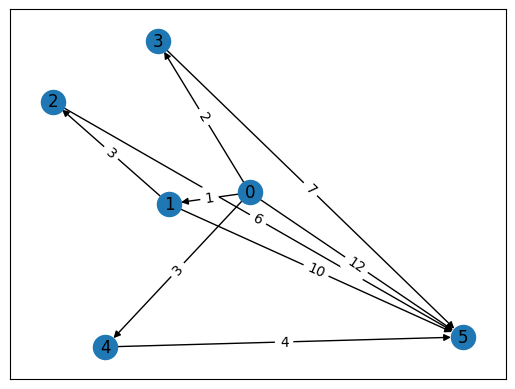

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt

# Edges with costs for truck and drone paths
truck_path_edges = [[0, 1, 1], [1, 2, 3], [2, 5, 6], [0, 3, 2], [3, 5, 7], [0, 4, 3], [4, 5, 5]]
drone_path_edges = [[0, 5, 12], [4, 5, 4], [3, 5, 7], [1, 5, 10], [2, 5, 6]]

# Create directed graph
G = nx.DiGraph()

# Add truck path edges to the graph
for edge in truck_path_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], vehicle='truck')

# Add drone path edges to the graph
for edge in drone_path_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], vehicle='drone')

# Create the optimization model
m = gp.Model('hybrid_delivery')

# Decision variable
use_drone = m.addVar(vtype=GRB.BINARY, name="use_drone")

# Objective function: minimize total cost
m.setObjective(use_drone * sum(G.edges[edge]['weight'] for edge in G.edges() if G.edges[edge]['vehicle'] == 'drone'), GRB.MINIMIZE)

# Constraints
# If the truck's combined cost from start to final node is greater than the drone's cost from an intermediate node to the final node, use the drone
for edge in truck_path_edges:
    if edge[1] == 5:  # Final destination
        continue
    if edge[2] + min(drone_edge[2] for drone_edge in drone_path_edges if drone_edge[0] == edge[1]) > \
            sum(drone_edge[2] for drone_edge in drone_path_edges if drone_edge[0] == 5):
        m.addConstr(use_drone >= 1, f"use_drone_at_{edge[1]}")
    else:
        m.addConstr(use_drone <= 0, f"use_truck_at_{edge[1]}")

# Solve the optimization model
m.optimize()

# Extract and print solution
if use_drone.x > 0.5:
    print("Use truck up to an intermediate node and then switch to drone.")
    truck_path = nx.shortest_path(G, source=0, target=1)
    drone_path = nx.shortest_path(G, source=1, target=5)
    total_cost = sum(G.edges[edge]['weight'] for edge in zip(truck_path[:-1], truck_path[1:])) + \
                 sum(G.edges[edge]['weight'] for edge in zip(drone_path[:-1], drone_path[1:]))
    print("Total Cost:", total_cost)
    print("Truck Path:", truck_path)
    print("Drone Path:", drone_path)
else:
    print("Use truck for the entire route.")
    truck_path = nx.shortest_path(G, source=0, target=5)
    total_cost = sum(G.edges[edge]['weight'] for edge in zip(truck_path[:-1], truck_path[1:]))
    print("Total Cost:", total_cost)
    print("Truck Path:", truck_path)

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = {(u, v): f"{G.edges[u, v]['weight']}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [ ]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt

# Define edges with costs for truck and drone paths
truck_path_edges = [[0, 1, 1], [1, 2, 3], [2, 5, 6], [0, 3, 2], [3, 5, 7], [0, 4, 3], [4, 5, 4]]
drone_path_edges = [[0, 5, 12], [4, 5, 4], [3, 5, 7], [1, 5, 10], [2, 5, 6]]

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for edge in truck_path_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], vehicle='truck')
for edge in drone_path_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], vehicle='drone')

# Create the optimization model
m = gp.Model('hybrid_delivery')

# Decision variables for using truck or drone on each edge
truck_vars = m.addVars(truck_path_edges, vtype=GRB.BINARY, name='truck')
drone_vars = m.addVars(drone_path_edges, vtype=GRB.BINARY, name='drone')

# Objective function: minimize total cost
total_truck_cost = gp.quicksum(edge[2] * truck_vars[edge] for edge in truck_path_edges)
total_drone_cost = gp.quicksum(edge[2] * drone_vars[edge] for edge in drone_path_edges)
m.setObjective(total_truck_cost + total_drone_cost, GRB.MINIMIZE)

# Constraint: define the routing logic
# Ensure only one path is chosen: either all truck or truck to a point then drone
m.addConstrs(truck_vars.sum('*', v) <= 1 for v in G.nodes() if v != 0)  # At most one truck route enters each node (except the start)
m.addConstrs(drone_vars.sum('*', v) <= 1 for v in G.nodes() if v != 5)  # At most one drone route enters each node (except the end)

# If a drone path is used, the corresponding truck path to the starting node of the drone must be used
for edge in drone_path_edges:
    start_node = edge[0]
    m.addConstr(drone_vars[edge] <= gp.quicksum(truck_vars[(i, j, w)] for i, j, w in truck_path_edges if j == start_node))

# Solve the optimization model
m.optimize()

# Extract and print the solution paths and total cost
total_cost = 0
if m.status == GRB.OPTIMAL:
    print("Optimal solution found:")
    truck_path = [edge for edge in truck_path_edges if truck_vars[edge].x > 0.5]
    drone_path = [edge for edge in drone_path_edges if drone_vars[edge].x > 0.5]
    print("Truck Path:", truck_path)
    print("Drone Path:", drone_path)
    total_cost = sum(edge[2] for edge in truck_path) + sum(edge[2] for edge in drone_path)
    print("Total Cost:", total_cost)
else:
    print("No optimal solution found.")

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = {(u, v): f"{G.edges[u, v]['weight']} ({G.edges[u, v]['vehicle']})" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [ ]:
pip install gurobipy